<a href="https://colab.research.google.com/github/MadhavMadan336/AI-ML-LAB/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the Data (Scaling pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# Reshape Data for CNN Input (Adding Channel Dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# Define Neural Network Model (CNN)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the Model
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9131 - loss: 0.2865 - val_accuracy: 0.9855 - val_loss: 0.0435
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9865 - loss: 0.0445 - val_accuracy: 0.9868 - val_loss: 0.0368
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9927 - loss: 0.0211 - val_accuracy: 0.9905 - val_loss: 0.0287
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9907 - val_loss: 0.0300
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9920 - val_loss: 0.0268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9885 - val_loss: 0.0430
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9972 -

In [8]:
# Evaluate Model Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9887 - loss: 0.0437
Test Accuracy: 99.08%


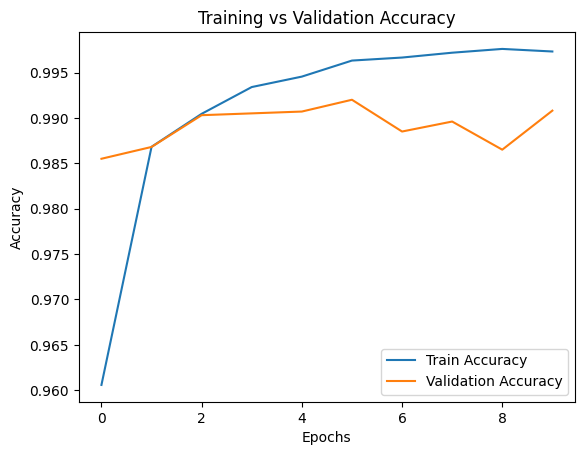

In [9]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [12]:
# Function to Predict Handwritten Digits
def predict_digit(image_index):
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    img = x_test[image_index].reshape(1, 28, 28, 1)  # Reshape for model input
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


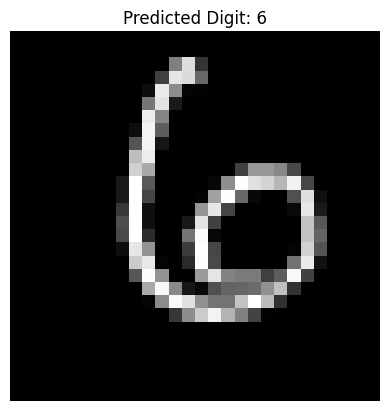

In [13]:
# Example Prediction (Test on a random digit)
predict_digit(100)  # Change the index to test different digits